<a href="https://colab.research.google.com/github/atishaye/Video-Recommendation-System/blob/main/Google%20Colab%20Notebooks/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Utilities

In [ ]:
import re, nltk, spacy, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

### Getting Data from Video-Recommendation-System.git

In [3]:
!git clone https://github.com/atishaye/Video-Recommendation-System.git

fatal: destination path 'Video-Recommendation-System' already exists and is not an empty directory.


In [4]:
import pandas as pd
path = "/content/Video-Recommendation-System/Data/preprocessed_dataset.csv"
df = pd.read_csv(path)
print('We have',len(df), 'transcripts in the data')

We have 25 transcripts in the data


In [ ]:
import spacy
nlp = spacy.load('en')

#Lemmatization

In [6]:
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

In [ ]:
df["Preprocessed"] =  df.apply(lambda x: lemmatizer(x['Preprocessed']), axis=1)

In [8]:
df

,title,transcript,Preprocessed
0,astronomy,astronomy literally meaning the science that s...,astronomy literally mean science study law sta...
1,white dwarf,a white dwarf also called a degenerate dwarf i...,white dwarf also call degenerate dwarf stellar...
2,chimp,chimpanzees are great apes found across centra...,chimpanzee great ape find across central west ...
3,crypto,what are the top four crypto exchanges india w...,top four crypto exchange india buy two poker c...
4,crypto_tax,india recently introduced crypto tax in the bu...,india recently introduce crypto tax budget two...
5,crypto_means,crypto is just one big ponzi and can change my...,crypto one big pond change mind doubt sell wis...
6,digital_token,token from your next the word pawnshop in lieu...,token next word pawnshop lieu small change nex...
7,cryptocurrency,a run up in cryptocurrency prices last decembe...,run cryptocurrency price last december also di...
8,dodo,the dodo is an extinct flightless bird that wa...,todo extinct flightless bird endemic island vi...
9,dolphin,dolphins are small toothed cetaceans easily re...,dolphin small toothed cetacean easily recogniz...


#Analysis of Preprocessed Text

##Word Cloud

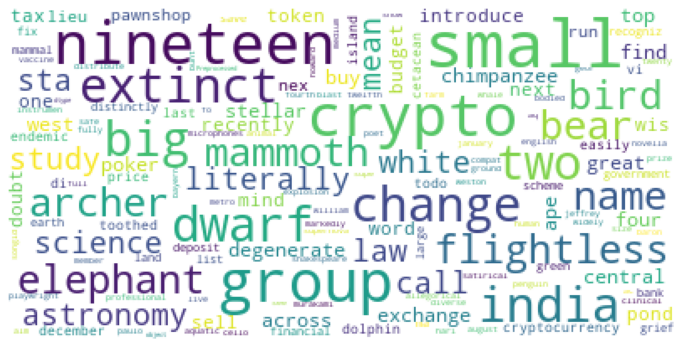

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['Preprocessed']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

##Unigram

In [10]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Preprocessed'], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

In [11]:
df2

,unigram,count
0,fund,35
1,specie,31
2,nineteen,29
3,crypto,29
4,long,28
5,star,27
6,white,27
7,year,27
8,thousand,27
9,market,27


In [12]:
fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams"))
fig.show()

##Bigram

In [13]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Preprocessed'], 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

In [14]:
df3

,bigram,count
0,white dwarf,19
1,mutual fund,18
2,digital asset,8
3,fix income,8
4,nineteen eighty,8
5,crypto exchange,7
6,thirty percent,6
7,year ago,5
8,risk appetite,5
9,asian elephant,5


In [15]:
fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 Bigrams"))
fig.show()

##Trigram

In [16]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Preprocessed'], 20)
df4 = pd.DataFrame(common_words, columns = ['Trigram' , 'Count'])

In [17]:
df4

,Trigram,Count
0,virtual digital asset,4
1,subject market risk,3
2,sell million copy,3
3,thousand year ago,3
4,mutual fund scheme,3
5,invest mutual fund,3
6,nineteen white dwarf,2
7,electron degenerate pressure,2
8,close live relative,2
9,million year ago,2


In [18]:
fig = go.Figure([go.Bar(x=df4['Trigram'], y=df4['Count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 Trigrams"))
fig.show()

#Vectorization

In [19]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(df['Preprocessed'])

lda_model = LatentDirichletAllocation(n_components=20, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

#pyLDAvis

In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

In [21]:
p

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
10     -10.878068   10.538728       1        1  18.744279
1      -60.884026  -75.591820       2        1  14.038165
15      -2.336119  -53.289074       3        1  12.347977
8      -61.385319  -12.914634       4        1  11.400861
3      -28.737743  126.296997       5        1   9.004110
19       1.066606 -123.552811       6        1   6.679894
17      45.140720   -7.947869       7        1   5.198560
14    -140.795975  -98.530548       8        1   4.915793
2       61.531681  -83.240562       9        1   4.055286
5      -72.563057 -140.396881      10        1   3.969238
7       15.984491   63.578186      11        1   2.635562
9     -160.851624   68.945145      12        1   2.452845
18      85.961830   51.922935      13        1   2.205403
6      -99.020836  109.936348      14        1   2.033355
11    -176.764130   -8.681684      15        1   0.053112
0     -117.189880  -37.420200      16        1   0.053112
16     108.829918  -22.946203      17        1   0.053112
12      47.588097  121.934814      18        1   0.053112
4     -106.467834   30.176889      19        1   0.053112
13     -50.613804   59.328842      20        1   0.053112, topic_info=         Term       Freq      Total Category  logprob  loglift
102      fund  29.000000  29.000000  Default  30.0000  30.0000
299     white  20.000000  20.000000  Default  29.0000  29.0000
253    specie  25.000000  25.000000  Default  28.0000  28.0000
67      dwarf  15.000000  15.000000  Default  27.0000  27.0000
257      star  20.000000  20.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
15       bank   0.004498   8.225554  Topic20  -5.6146   0.0292
75   elephant   0.004651  22.209325  Topic20  -5.5813  -0.9308
240   seventy   0.004438   6.928192  Topic20  -5.6280   0.1874
239     seven   0.004428  10.347170  Topic20  -5.6303  -0.2159
25      black   0.004404   9.450643  Topic20  -5.6358  -0.1308

[928 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         2  0.227853  accord
0         4  0.227853  accord
0         5  0.341779  accord
0         6  0.113926  accord
1         1  0.435726   adult
...     ...       ...     ...
306       8  0.096891    year
306      10  0.048445    year
307       1  0.212017   young
307       3  0.212017   young
307       4  0.212017   young

[985 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 2, 16, 9, 4, 20, 18, 15, 3, 6, 8, 10, 19, 7, 12, 1, 17, 13, 5, 14])

In [22]:
import pyLDAvis.gensim_models as gensimvis

In [23]:
pyLDAvis.save_html(p, 'lda.html')

#Extracting Topic Keywords


In [24]:
# Show top 12 keywords for each topic
import numpy as np
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=30):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=30)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
#df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]

df_topic_keywords['Topic Keywords'] = df_topic_keywords[df_topic_keywords.columns[0:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
df_topic_keywords



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 21,Word 22,Word 23,Word 24,Word 25,Word 26,Word 27,Word 28,Word 29,Topic Keywords
0,specie,large,elephant,thousand,point,ton,structure,asian,mass,hunt,...,tooth,climate,list,know,mammal,result,fall,short,year,specie large elephant thousand point ton struc...
1,fund,risk,market,mutual,invest,investment,fix,long,scheme,income,...,thousand,term,return,stock,price,large,base,financial,average,fund risk market mutual invest investment fix ...
2,financial,finance,time,mean,company,asset,value,work,network,money,...,simply,pay,fund,head,negative,market,country,complex,come,financial finance time mean company asset valu...
3,return,cryptocurrency,crypto,bitcoin,coin,percent,market,price,point,say,...,research,investor,time,start,asset,worth,mean,ninety,entire,return cryptocurrency crypto bitcoin coin perc...
4,second,set,evidence,pron,hole,invest,mass,major,stock,august,...,fish,fourteen,sell,today,ninety,study,right,late,matter,second set evidence pron hole invest mass majo...
5,use,live,male,female,walk,open,seven,leave,eat,nest,...,water,think,build,mean,range,community,life,generally,shape,use live male female walk open seven leave eat...
6,use,cryptocurrency,currency,work,exchange,service,like,good,cryptocurrencie,small,...,volatility,time,network,global,dollar,tool,big,mean,difference,use cryptocurrency currency work exchange serv...
7,thousand,bird,novel,nineteen,border,south,short,story,think,work,...,world,set,come,copy,people,new,character,language,international,thousand bird novel nineteen border south shor...
8,asset,crypto,base,percent,thirty,cryptocurrency,study,say,long,make,...,development,non,provide,cryptocurrencie,receive,expert,develop,return,believe,asset crypto base percent thirty cryptocurrenc...
9,animal,book,way,nineteen,time,sell,include,good,great,cold,...,human,people,little,hold,easily,success,tell,november,old,animal book way nineteen time sell include goo...


In [25]:
df_topic_keywords['Topic Keywords'] = df_topic_keywords[df_topic_keywords.columns[0:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 21,Word 22,Word 23,Word 24,Word 25,Word 26,Word 27,Word 28,Word 29,Topic Keywords
0,specie,large,elephant,thousand,point,ton,structure,asian,mass,hunt,...,tooth,climate,list,know,mammal,result,fall,short,year,specie large elephant thousand point ton struc...
1,fund,risk,market,mutual,invest,investment,fix,long,scheme,income,...,thousand,term,return,stock,price,large,base,financial,average,fund risk market mutual invest investment fix ...
2,financial,finance,time,mean,company,asset,value,work,network,money,...,simply,pay,fund,head,negative,market,country,complex,come,financial finance time mean company asset valu...
3,return,cryptocurrency,crypto,bitcoin,coin,percent,market,price,point,say,...,research,investor,time,start,asset,worth,mean,ninety,entire,return cryptocurrency crypto bitcoin coin perc...
4,second,set,evidence,pron,hole,invest,mass,major,stock,august,...,fish,fourteen,sell,today,ninety,study,right,late,matter,second set evidence pron hole invest mass majo...
5,use,live,male,female,walk,open,seven,leave,eat,nest,...,water,think,build,mean,range,community,life,generally,shape,use live male female walk open seven leave eat...
6,use,cryptocurrency,currency,work,exchange,service,like,good,cryptocurrencie,small,...,volatility,time,network,global,dollar,tool,big,mean,difference,use cryptocurrency currency work exchange serv...
7,thousand,bird,novel,nineteen,border,south,short,story,think,work,...,world,set,come,copy,people,new,character,language,international,thousand bird novel nineteen border south shor...
8,asset,crypto,base,percent,thirty,cryptocurrency,study,say,long,make,...,development,non,provide,cryptocurrencie,receive,expert,develop,return,believe,asset crypto base percent thirty cryptocurrenc...
9,animal,book,way,nineteen,time,sell,include,good,great,cold,...,human,people,little,hold,easily,success,tell,november,old,animal book way nineteen time sell include goo...


In [26]:
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 21,Word 22,Word 23,Word 24,Word 25,Word 26,Word 27,Word 28,Word 29,Topic Keywords
0,specie,large,elephant,thousand,point,ton,structure,asian,mass,hunt,...,tooth,climate,list,know,mammal,result,fall,short,year,specie large elephant thousand point ton struc...
1,fund,risk,market,mutual,invest,investment,fix,long,scheme,income,...,thousand,term,return,stock,price,large,base,financial,average,fund risk market mutual invest investment fix ...
2,financial,finance,time,mean,company,asset,value,work,network,money,...,simply,pay,fund,head,negative,market,country,complex,come,financial finance time mean company asset valu...
3,return,cryptocurrency,crypto,bitcoin,coin,percent,market,price,point,say,...,research,investor,time,start,asset,worth,mean,ninety,entire,return cryptocurrency crypto bitcoin coin perc...
4,second,set,evidence,pron,hole,invest,mass,major,stock,august,...,fish,fourteen,sell,today,ninety,study,right,late,matter,second set evidence pron hole invest mass majo...
5,use,live,male,female,walk,open,seven,leave,eat,nest,...,water,think,build,mean,range,community,life,generally,shape,use live male female walk open seven leave eat...
6,use,cryptocurrency,currency,work,exchange,service,like,good,cryptocurrencie,small,...,volatility,time,network,global,dollar,tool,big,mean,difference,use cryptocurrency currency work exchange serv...
7,thousand,bird,novel,nineteen,border,south,short,story,think,work,...,world,set,come,copy,people,new,character,language,international,thousand bird novel nineteen border south shor...
8,asset,crypto,base,percent,thirty,cryptocurrency,study,say,long,make,...,development,non,provide,cryptocurrencie,receive,expert,develop,return,believe,asset crypto base percent thirty cryptocurrenc...
9,animal,book,way,nineteen,time,sell,include,good,great,cold,...,human,people,little,hold,easily,success,tell,november,old,animal book way nineteen time sell include goo...


#Extracting Dominant Topic

In [27]:
# Create Document - Topic Matrix

lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = df_topic_keywords.T.columns
# topicnames = ["Topic" + str(i) for i in range(20)]

# index names
docnames = ["Transcript " + str(i) for i in range(len(df))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 5), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

In [28]:
df_document_topic

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,dominant_topic
Transcript 0,0.00109,0.00109,0.00109,0.00109,0.00109,0.00109,0.00109,0.00109,0.00109,0.00109,...,0.00109,0.00109,0.00109,0.00109,0.97935,0.00109,0.00109,0.00109,0.00109,15
Transcript 1,0.00045,0.00045,0.00045,0.00045,0.00045,0.00045,0.00045,0.00045,0.00045,0.00045,...,0.00045,0.00045,0.00045,0.00045,0.00045,0.00045,0.99152,0.00045,0.00045,17
Transcript 2,0.00054,0.00054,0.00054,0.00054,0.00054,0.98978,0.00054,0.00054,0.00054,0.00054,...,0.00054,0.00054,0.00054,0.00054,0.00054,0.00054,0.00054,0.00054,0.00054,5
Transcript 3,0.00032,0.00032,0.00032,0.00032,0.00032,0.00032,0.00032,0.00032,0.00032,0.00032,...,0.00032,0.00032,0.00032,0.00032,0.00032,0.00032,0.00032,0.00032,0.99391,19
Transcript 4,0.00030,0.00030,0.00030,0.00030,0.00030,0.00030,0.00030,0.00030,0.99431,0.00030,...,0.00030,0.00030,0.00030,0.00030,0.00030,0.00030,0.00030,0.00030,0.00030,8
Transcript 5,0.00070,0.00070,0.00070,0.98662,0.00070,0.00070,0.00070,0.00070,0.00070,0.00070,...,0.00070,0.00070,0.00070,0.00070,0.00070,0.00070,0.00070,0.00070,0.00070,3
Transcript 6,0.00104,0.00104,0.00104,0.00104,0.00104,0.00104,0.98021,0.00104,0.00104,0.00104,...,0.00104,0.00104,0.00104,0.00104,0.00104,0.00104,0.00104,0.00104,0.00104,6
Transcript 7,0.00035,0.00035,0.00035,0.99326,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,...,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,3
Transcript 8,0.00111,0.00111,0.00111,0.00111,0.00111,0.00111,0.00111,0.00111,0.00111,0.00111,...,0.00111,0.00111,0.00111,0.00111,0.00111,0.00111,0.00111,0.00111,0.00111,10
Transcript 9,0.00065,0.00065,0.00065,0.00065,0.00065,0.00065,0.00065,0.00065,0.00065,0.00065,...,0.00065,0.00065,0.00065,0.00065,0.00065,0.00065,0.00065,0.00065,0.00065,10


In [29]:
df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(df, df_document_topic, left_index=True, right_index=True)
df_sent_topic.drop('index', axis=1, inplace=True)

In [30]:
df_sent_topic

,title,transcript,Preprocessed,0,1,2,3,4,5,6,...,11,12,13,14,15,16,17,18,19,dominant_topic
0,astronomy,astronomy literally meaning the science that s...,astronomy literally mean science study law sta...,0.00109,0.00109,0.00109,0.00109,0.00109,0.00109,0.00109,...,0.00109,0.00109,0.00109,0.00109,0.97935,0.00109,0.00109,0.00109,0.00109,15
1,white dwarf,a white dwarf also called a degenerate dwarf i...,white dwarf also call degenerate dwarf stellar...,0.00045,0.00045,0.00045,0.00045,0.00045,0.00045,0.00045,...,0.00045,0.00045,0.00045,0.00045,0.00045,0.00045,0.99152,0.00045,0.00045,17
2,chimp,chimpanzees are great apes found across centra...,chimpanzee great ape find across central west ...,0.00054,0.00054,0.00054,0.00054,0.00054,0.98978,0.00054,...,0.00054,0.00054,0.00054,0.00054,0.00054,0.00054,0.00054,0.00054,0.00054,5
3,crypto,what are the top four crypto exchanges india w...,top four crypto exchange india buy two poker c...,0.00032,0.00032,0.00032,0.00032,0.00032,0.00032,0.00032,...,0.00032,0.00032,0.00032,0.00032,0.00032,0.00032,0.00032,0.00032,0.99391,19
4,crypto_tax,india recently introduced crypto tax in the bu...,india recently introduce crypto tax budget two...,0.00030,0.00030,0.00030,0.00030,0.00030,0.00030,0.00030,...,0.00030,0.00030,0.00030,0.00030,0.00030,0.00030,0.00030,0.00030,0.00030,8
5,crypto_means,crypto is just one big ponzi and can change my...,crypto one big pond change mind doubt sell wis...,0.00070,0.00070,0.00070,0.98662,0.00070,0.00070,0.00070,...,0.00070,0.00070,0.00070,0.00070,0.00070,0.00070,0.00070,0.00070,0.00070,3
6,digital_token,token from your next the word pawnshop in lieu...,token next word pawnshop lieu small change nex...,0.00104,0.00104,0.00104,0.00104,0.00104,0.00104,0.98021,...,0.00104,0.00104,0.00104,0.00104,0.00104,0.00104,0.00104,0.00104,0.00104,6
7,cryptocurrency,a run up in cryptocurrency prices last decembe...,run cryptocurrency price last december also di...,0.00035,0.00035,0.00035,0.99326,0.00035,0.00035,0.00035,...,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,0.00035,3
8,dodo,the dodo is an extinct flightless bird that wa...,todo extinct flightless bird endemic island vi...,0.00111,0.00111,0.00111,0.00111,0.00111,0.00111,0.00111,...,0.00111,0.00111,0.00111,0.00111,0.00111,0.00111,0.00111,0.00111,0.00111,10
9,dolphin,dolphins are small toothed cetaceans easily re...,dolphin small toothed cetacean easily recogniz...,0.00065,0.00065,0.00065,0.00065,0.00065,0.00065,0.00065,...,0.00065,0.00065,0.00065,0.00065,0.00065,0.00065,0.00065,0.00065,0.00065,10


##Organising Data

In [31]:
df_topic_theme = df_sent_topic[['Preprocessed', 'dominant_topic']]
#df_topic_theme.rename(columns = {'dominant_topic' : 'Topic'}, inplace = True)

In [32]:
print(df_topic_theme.dtypes)
df_topic_theme.head(25)

Preprocessed      object
dominant_topic     int64
dtype: object


,Preprocessed,dominant_topic
0,astronomy literally mean science study law sta...,15
1,white dwarf also call degenerate dwarf stellar...,17
2,chimpanzee great ape find across central west ...,5
3,top four crypto exchange india buy two poker c...,19
4,india recently introduce crypto tax budget two...,8
5,crypto one big pond change mind doubt sell wis...,3
6,token next word pawnshop lieu small change nex...,6
7,run cryptocurrency price last december also di...,3
8,todo extinct flightless bird endemic island vi...,10
9,dolphin small toothed cetacean easily recogniz...,10


In [33]:
df5 = df_topic_keywords.loc[:, df_topic_keywords.columns.intersection(['Topic Keywords'])]
#df5.index.name = 'Topic'
#df5['Topic'].astype(str).astype(int)
print(df5.dtypes)
df5

Topic Keywords    object
dtype: object


,Topic Keywords
0,specie large elephant thousand point ton struc...
1,fund risk market mutual invest investment fix ...
2,financial finance time mean company asset valu...
3,return cryptocurrency crypto bitcoin coin perc...
4,second set evidence pron hole invest mass majo...
5,use live male female walk open seven leave eat...
6,use cryptocurrency currency work exchange serv...
7,thousand bird novel nineteen border south shor...
8,asset crypto base percent thirty cryptocurrenc...
9,animal book way nineteen time sell include goo...


#Export Data

In [34]:
final_df = pd.merge(df_topic_theme, df5, left_on = 'dominant_topic', right_index=True, how = 'left')
final_df.drop('Preprocessed', axis=1, inplace=True)
#final_df.drop('Topic Keywords', axis=1, inplace=True) 
final_df.index.name = 'Video/Audio Id'
final_df['Topic Keywords'] = final_df['Topic Keywords'].apply(lambda x: ', '.join(x.split(" ")))
final_df

,dominant_topic,Topic Keywords
Video/Audio Id,,
0,15,"nineteen, star, write, book, eighty, publish, ..."
1,17,"dwarf, white, star, mass, time, point, pressur..."
2,5,"use, live, male, female, walk, open, seven, le..."
3,19,"exchange, crypto, investor, bitcoin, india, tr..."
4,8,"asset, crypto, base, percent, thirty, cryptocu..."
5,3,"return, cryptocurrency, crypto, bitcoin, coin,..."
6,6,"use, cryptocurrency, currency, work, exchange,..."
7,3,"return, cryptocurrency, crypto, bitcoin, coin,..."
8,10,"elephant, specie, live, large, female, small, ..."


In [35]:
final_df.to_csv('Topics.csv')